Content:<br/>
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

References:<br/>

* United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

* World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

* [Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

* World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

Inspiration :
Suicide Prevention.

In [1]:
#Load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
DataFile = pd.read_csv("../input/master.csv")
import gc

# Initial Analysis

In [2]:
DataFile.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
DataFile.shape

(27820, 12)

In [4]:
features = [c for c in DataFile.columns if c not in ['population','suicides_no']]

As you may notice, I have removed Suicide number, as it may not hold much reference, without considering the population. Instead Suicide/100k pop will make a lot more sense. 

In [5]:
NewData = DataFile[features]

# Group by Age and Countries

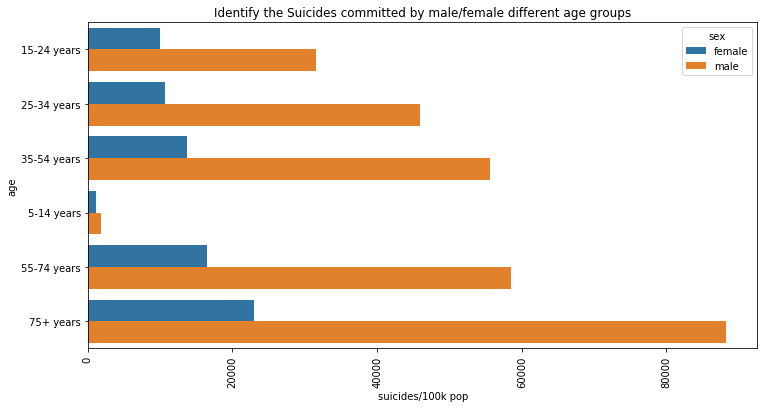

In [6]:
plt.figure(figsize=(12, 6));
Age_Country = pd.DataFrame(NewData.groupby(['age','sex'],sort=True)['suicides/100k pop'].sum()).reset_index()
plot1 = Age_Country.sort_values(by=['suicides/100k pop','age'], ascending=False)
plot1.reset_index()
g = sns.barplot(x='suicides/100k pop', y='age', data=Age_Country, hue = 'sex');
plt.xticks(rotation=90)

plt.title('Identify the Suicides committed by male/female different age groups');

it is certainly indicative the number of suicides committed by Males is significantly higher when compared to females

# Group by Duration (Time Series) and Age

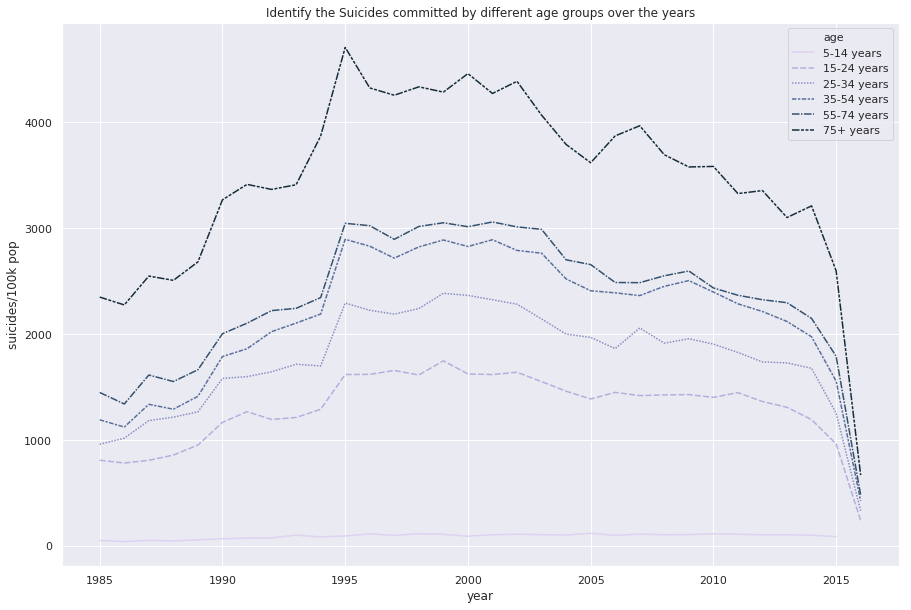

In [7]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html
from matplotlib.colors import LogNorm
timeseries = pd.DataFrame(NewData.groupby(['year','age'])['suicides/100k pop'].sum()).reset_index()
timeseries['age'] = timeseries.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides/100k pop',hue='age',style='age',data=timeseries,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)
plt.title('Identify the Suicides committed by different age groups over the years');

This graph identifies a higher suicidal tendies in Higher Age Group between 1985 and 1995. However the trend decreased after 1995 before a slight jump between 2005 - 2008

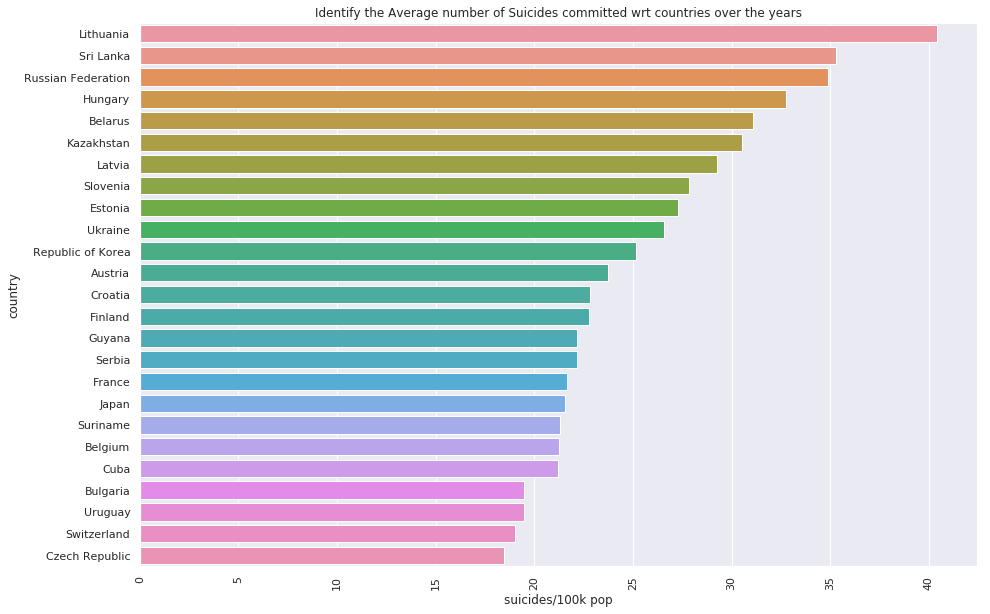

In [8]:
suicide_ctry = pd.DataFrame(NewData.groupby(['country'])['suicides/100k pop'].mean()).reset_index()
plot2 = suicide_ctry.sort_values(by=['suicides/100k pop','country'], ascending=False).head(25)
plot2.reset_index()
g = sns.barplot(x='suicides/100k pop', y='country', data=plot2);
plt.xticks(rotation=90)
plt.title('Identify the Average number of Suicides committed wrt countries over the years');

Lithuania and Shrilanka (for a surprise has the highest averages of suicides committed over the years

# Suicides by Countries GDP - Is Economy the factor?

In [9]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [10]:
num_pipeline = Pipeline([
       ("selector", DataFrameSelector(['gdp_per_capita ($)','suicides/100k pop'])),
       ('min_max_scaler', MinMaxScaler()),
     ])

no_pipeline = Pipeline([
        ("selector", DataFrameSelector(["country","year"]))
    ])

In [11]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    #("no_pipeline", no_pipeline),
    ])

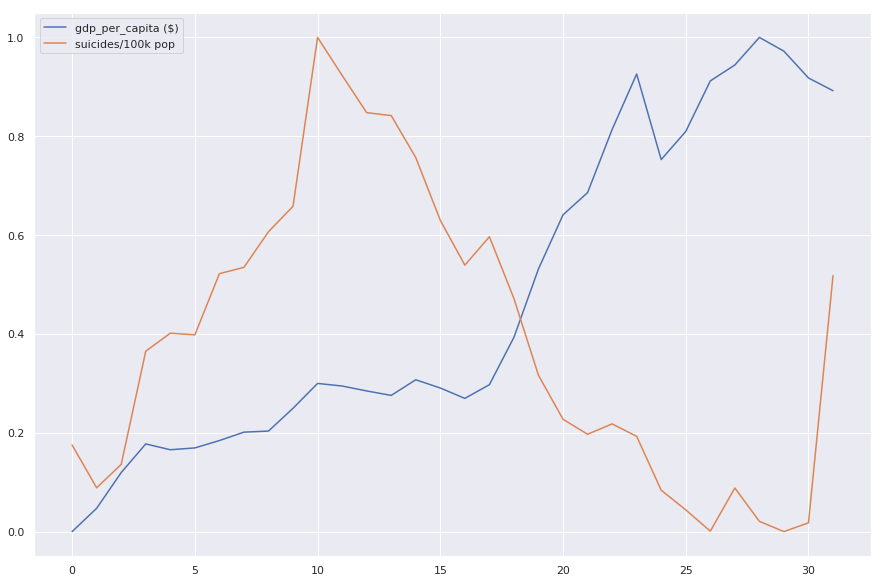

In [12]:
NewData_plot3 = NewData.pivot_table(['suicides/100k pop','gdp_per_capita ($)'],['year'], aggfunc='mean')

Scaled_Data = full_pipeline.fit_transform(NewData_plot3)
NewData_Scaled_Data = pd.DataFrame(Scaled_Data)

NewData_Scaled_Data.columns  = ['gdp_per_capita ($)','suicides/100k pop']
NewData_Scaled_Data.plot()

As Expected,A higher GDP led to lower Suicidal Rate and vica versa.

There is more to come! Enjoy Data Analytics